# Max Info Training Analysis
Base Models: ResNeXt50, ResNeXt101, ResNet152

In the following file I'll note the training of the above mentionaed base model with the most information given to them possible:
- 4 sequences (t1, t1c, t2 and flair) + 1 mask
- clinical data (age + sex)
- layer number

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import re

from plotting_analysis_funcs import *

/var/folders/by/b05bkcn50tb0fx4h3hhz0h800000gn/T/ipykernel_85001/2426438369.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## ResNeXt50

Epochs: 400
Lowest loss 5.9619 at learning rate 9.61e-02


0.09605058

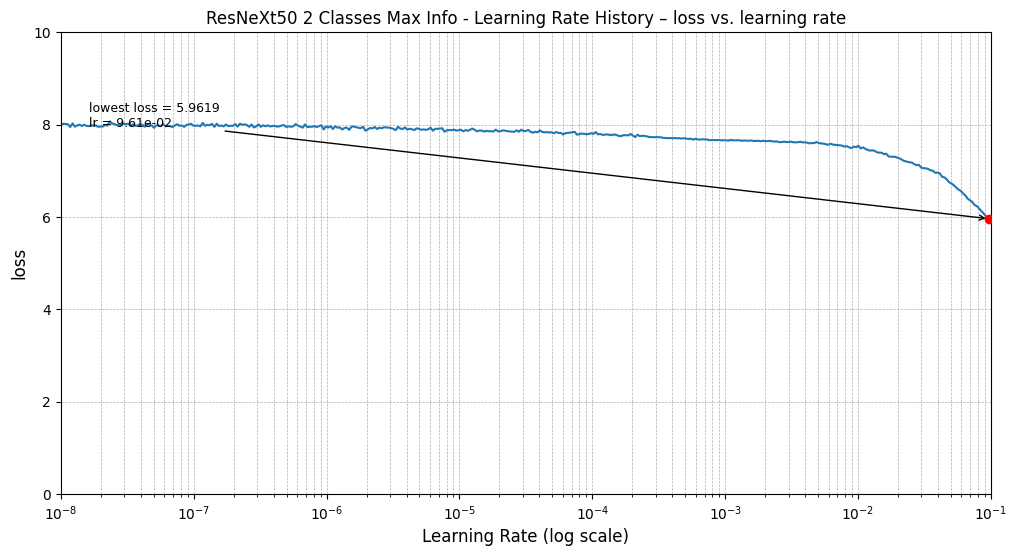

In [9]:
path_to_resnext50_max_info_2_classes_lr_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt50/2_classes_training/max_info/resnext50_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_lr_run_2025_12_29_22_30_57/history_resnext50_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_lr_run_2025_12_29_22_30_57.npy')

plot_lr_history(path_to_resnext50_max_info_2_classes_lr_history, title="ResNeXt50 2 Classes Max Info - Learning Rate History", y_axis_max=10)

I'll pick a learning rate of 3 x 10^-2 (0.03)

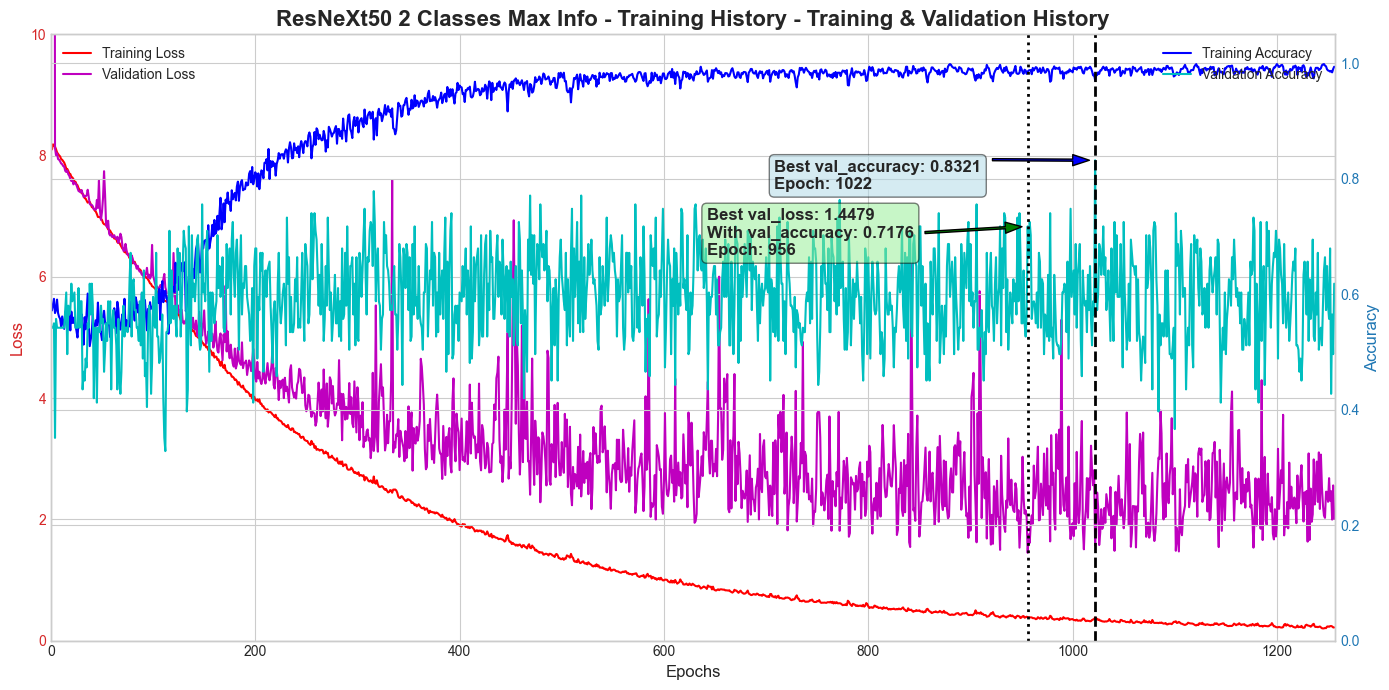

Training History Analysis for: 'ResNeXt50 2 Classes Max Info - Training History'
Total Epochs Trained: 1256
--------------------------------------------------
Lowest Validation Loss of 1.4479 achieved at Epoch 956.
Validation Accuracy at this epoch was 0.7176.
--------------------------------------------------
Highest Validation Accuracy of 0.8321 achieved at Epoch 1022.
Validation Loss at this epoch was 1.5729.


In [2]:
path_to_resnext50_max_info_2_classes_train_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt50/2_classes_training/max_info/resnext50_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_normal_run_2025_12_30_11_27_56/history_resnext50_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_normal_run_2025_12_30_11_27_56.npy')

plot_training_history(path_to_resnext50_max_info_2_classes_train_history, title="ResNeXt50 2 Classes Max Info - Training History", custom_loss_limit=10)

I'll increase the dropout rate to 0.45

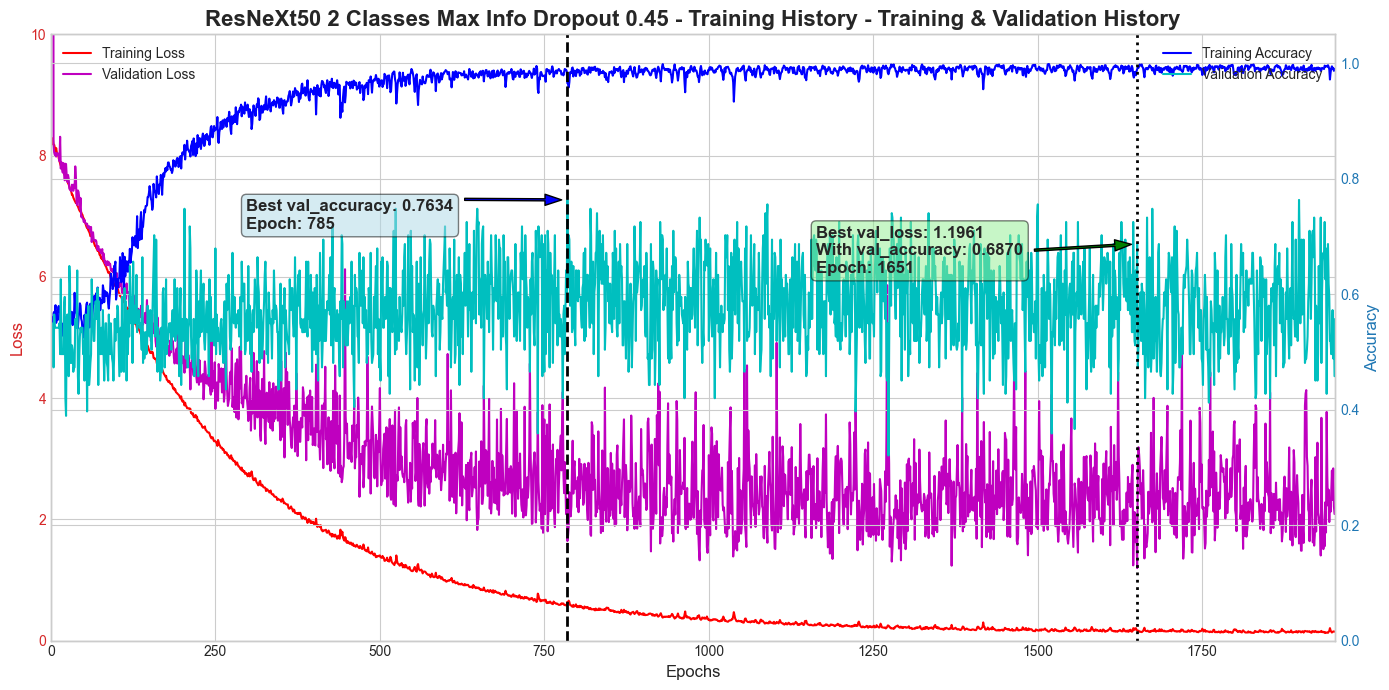

Training History Analysis for: 'ResNeXt50 2 Classes Max Info Dropout 0.45 - Training History'
Total Epochs Trained: 1951
--------------------------------------------------
Lowest Validation Loss of 1.1961 achieved at Epoch 1651.
Validation Accuracy at this epoch was 0.6870.
--------------------------------------------------
Highest Validation Accuracy of 0.7634 achieved at Epoch 785.
Validation Loss at this epoch was 1.6422.


In [2]:
path_to_resnext50_max_info_2_classes_dropout_045_train_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt50/2_classes_training/max_info/resnext50_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_normal_run_2026_01_02_18_16_12/history_resnext50_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_normal_run_2026_01_02_18_16_12.npy')

plot_training_history(path_to_resnext50_max_info_2_classes_dropout_045_train_history, title="ResNeXt50 2 Classes Max Info Dropout 0.45 - Training History", custom_loss_limit=10)

Actually seems worse than before, for the k-fold training, I'll stick with a dropout rate of 0.4

Searching for files in 1 location(s)...
Pattern '/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt50/2_classes_training/max_info/resnext50_00_2cls_slice_clin_layer_gray_seq[[]t1-t1c-t2-flair-mask[]]_normal_DA_kfold_run_2026_01_07_15_25_06/history_resnext50_00_2cls_slice_clin_layer_gray_seq[[]t1-t1c-t2-flair-mask[]]_normal_DA_kfold_fold_*_run_2026_01_07_15_25_06.npy' found 10 files.
Total unique files found: 10
Successfully loaded 10 folds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
All runs will be truncated to the shortest run length of 959 epochs for fair comparison.


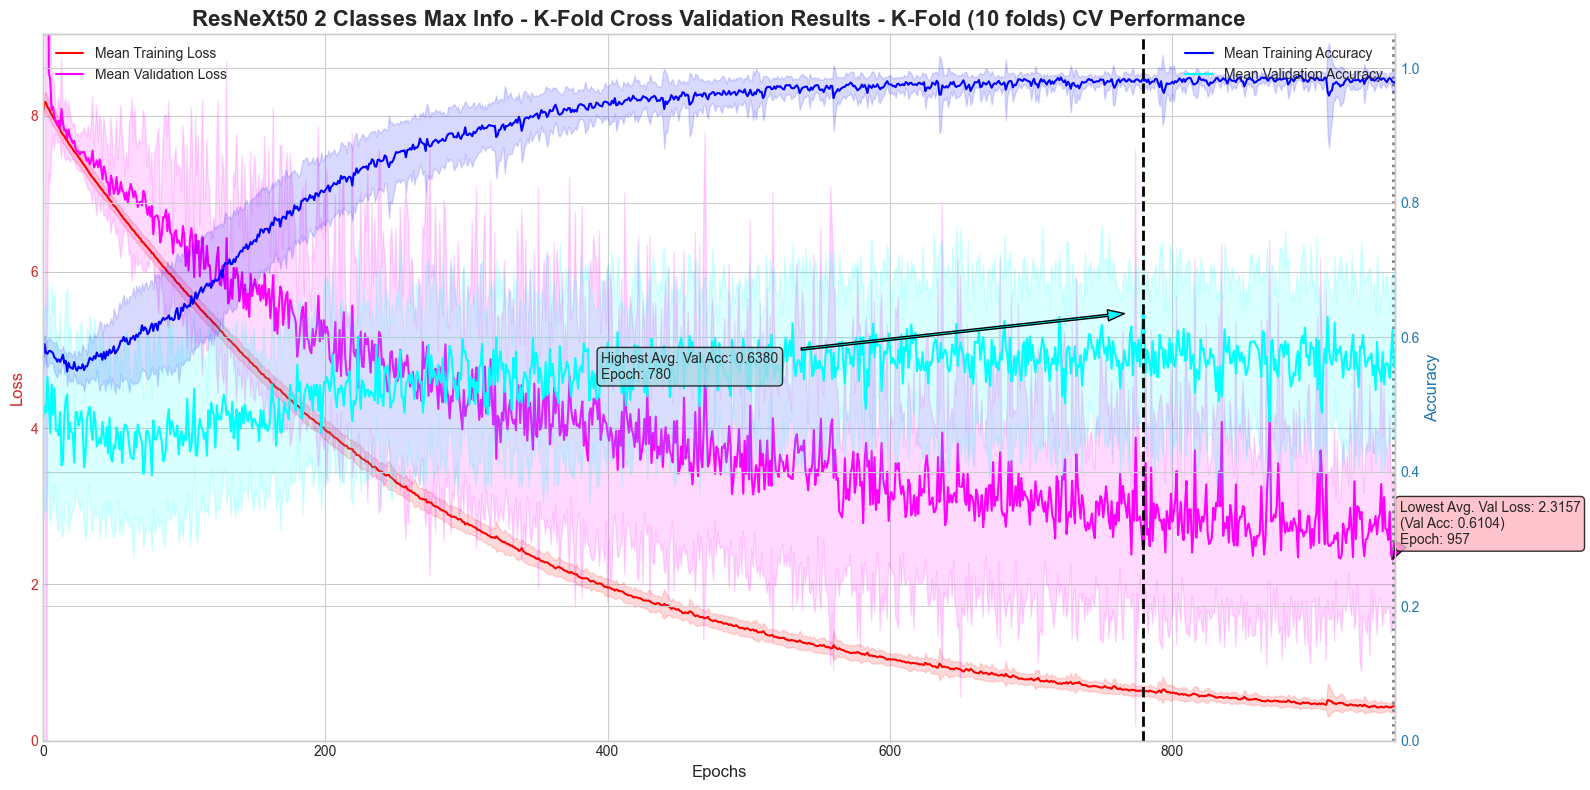

K-Fold Cross-Validation Summary for: 'ResNeXt50 2 Classes Max Info - K-Fold Cross Validation Results'
Analyzed 10 folds (Folds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).
Metrics truncated to 959 epochs.
------------------------------------------------------------
Best Average Validation Loss: 2.3157 at epoch 957
   - Validation Accuracy at this epoch: 0.6104
Highest Average Validation Accuracy: 0.6380 at epoch 780
ResNeXt50 2 Classes Max Info - K-Fold Cross Validation Summary - K-Fold Performance Summary
Searching for files in 1 location(s)...

--- Performance of 10 Unique Folds (at their individual best epochs) ---

      Total Epochs  Best Epoch  Val Accuracy  Val Loss  Train Accuracy  \
Fold                                                                     
0             1747         480        0.7557    2.8740          0.9753   
1             2324        1906        0.8147    1.5138          0.9882   
2             1455        1155        0.8197    1.1003          0.9858   
3             

In [2]:
path_to_resnext50_max_info_2_classes_k_fold_pattern = '/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt50/2_classes_training/max_info/resnext50_00_2cls_slice_clin_layer_gray_seq[[]t1-t1c-t2-flair-mask[]]_normal_DA_kfold_run_2026_01_07_15_25_06/history_resnext50_00_2cls_slice_clin_layer_gray_seq[[]t1-t1c-t2-flair-mask[]]_normal_DA_kfold_fold_*_run_2026_01_07_15_25_06.npy'

plot_kfold_results_with_confidence_band(
    path_to_resnext50_max_info_2_classes_k_fold_pattern,
    title = "ResNeXt50 2 Classes Max Info - K-Fold Cross Validation Results",
)

summarize_kfold_results(
    path_to_resnext50_max_info_2_classes_k_fold_pattern,
    title="ResNeXt50 2 Classes Max Info - K-Fold Cross Validation Summary",
)

## ResNeXt101

Epochs: 400
Lowest loss 11.1795 at learning rate 9.61e-02


0.09605058

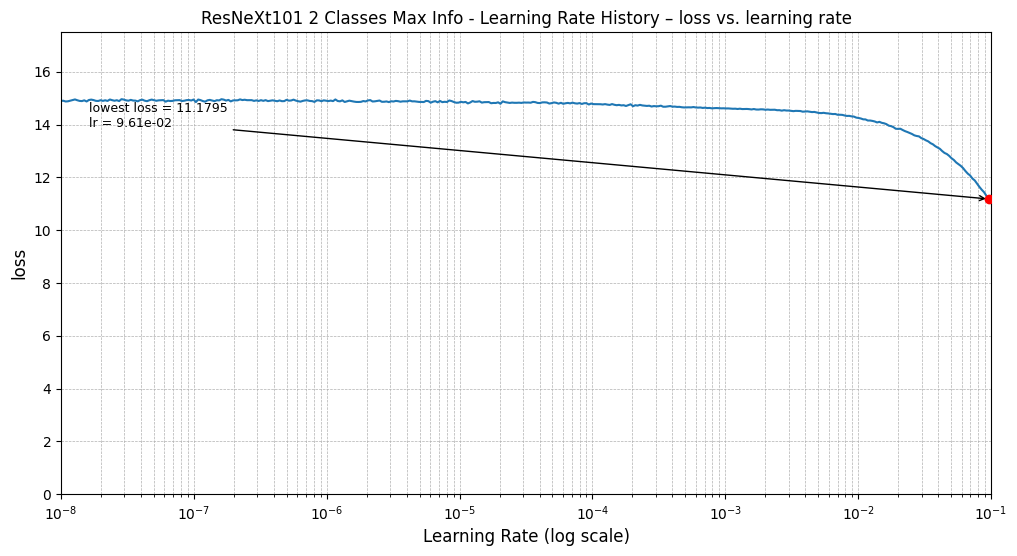

In [7]:
path_to_resnext101_max_info_2_classes_lr_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt101/2_classes_training/max_info/resnext101_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_lr_run_2025_12_29_23_26_58/history_resnext101_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_lr_run_2025_12_29_23_26_58.npy')

plot_lr_history(path_to_resnext101_max_info_2_classes_lr_history, title="ResNeXt101 2 Classes Max Info - Learning Rate History", y_axis_max=17.5)

I'll go with a learning rate of 3x10^-2 (0.03)

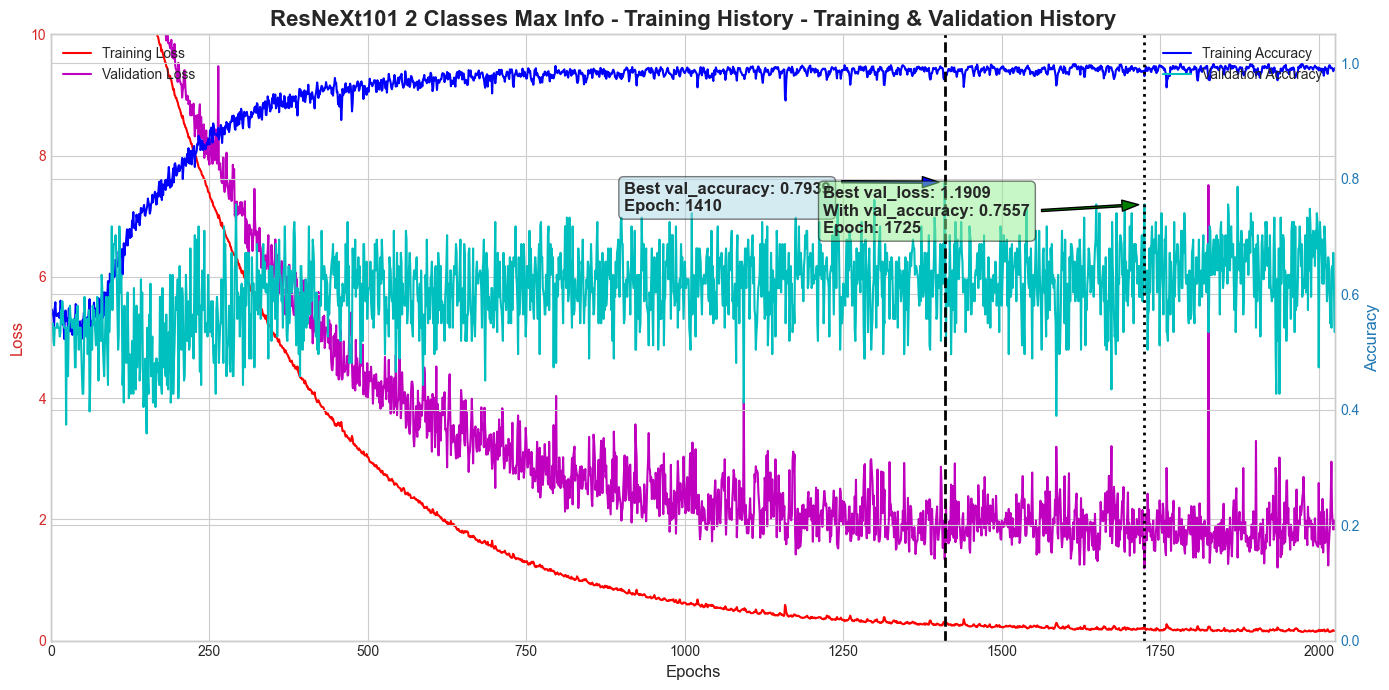

Training History Analysis for: 'ResNeXt101 2 Classes Max Info - Training History'
Total Epochs Trained: 2025
--------------------------------------------------
Lowest Validation Loss of 1.1909 achieved at Epoch 1725.
Validation Accuracy at this epoch was 0.7557.
--------------------------------------------------
Highest Validation Accuracy of 0.7939 achieved at Epoch 1410.
Validation Loss at this epoch was 1.3404.


In [3]:
path_to_resnext101_max_info_2_classes_train_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt101/2_classes_training/max_info/resnext101_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_normal_run_2025_12_30_14_18_35/history_resnext101_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_normal_run_2025_12_30_14_18_35.npy')

plot_training_history(path_to_resnext101_max_info_2_classes_train_history, title="ResNeXt101 2 Classes Max Info - Training History", custom_loss_limit=10)

I'll increase the dropout rate as well to 0.45

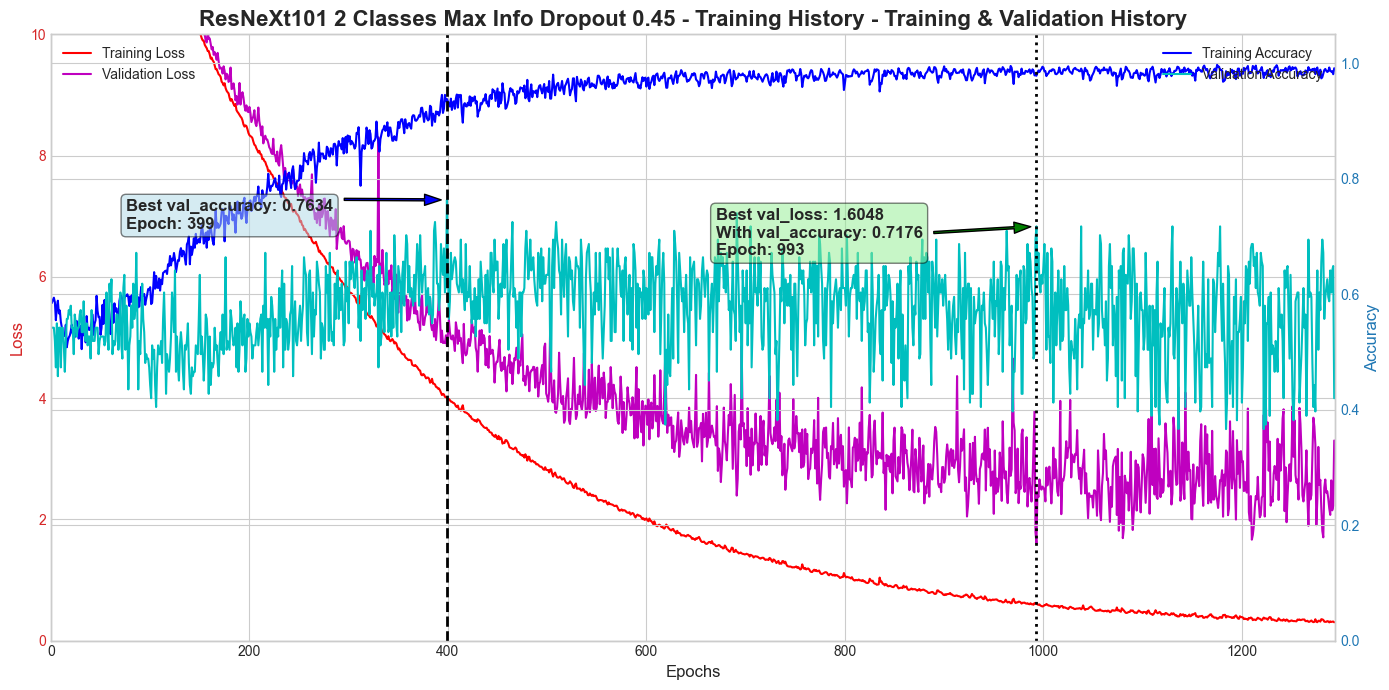

Training History Analysis for: 'ResNeXt101 2 Classes Max Info Dropout 0.45 - Training History'
Total Epochs Trained: 1293
--------------------------------------------------
Lowest Validation Loss of 1.6048 achieved at Epoch 993.
Validation Accuracy at this epoch was 0.7176.
--------------------------------------------------
Highest Validation Accuracy of 0.7634 achieved at Epoch 399.
Validation Loss at this epoch was 4.8654.


In [3]:
path_to_resnext101_max_info_2_classes_dropout_045_train_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt101/2_classes_training/max_info/resnext101_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_normal_run_2026_01_02_22_45_31/history_resnext101_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_normal_run_2026_01_02_22_45_31.npy')

plot_training_history(path_to_resnext101_max_info_2_classes_dropout_045_train_history, title="ResNeXt101 2 Classes Max Info Dropout 0.45 - Training History", custom_loss_limit=10)

Also worse than before, I'll stick with a dropout rate of 0.4 for the k-fold

Searching for files in 1 location(s)...
Pattern '/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt101/2_classes_training/max_info/resnext101_00_2cls_slice_clin_layer_gray_seq[[]t1-t1c-t2-flair-mask[]]_normal_DA_kfold_run_2026_01_12_14_08_53/history_resnext101_00_2cls_slice_clin_layer_gray_seq[[]t1-t1c-t2-flair-mask[]]_normal_DA_kfold_fold_*_run_2026_01_12_14_08_53.npy' found 10 files.
Total unique files found: 10
Successfully loaded 10 folds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
All runs will be truncated to the shortest run length of 1410 epochs for fair comparison.


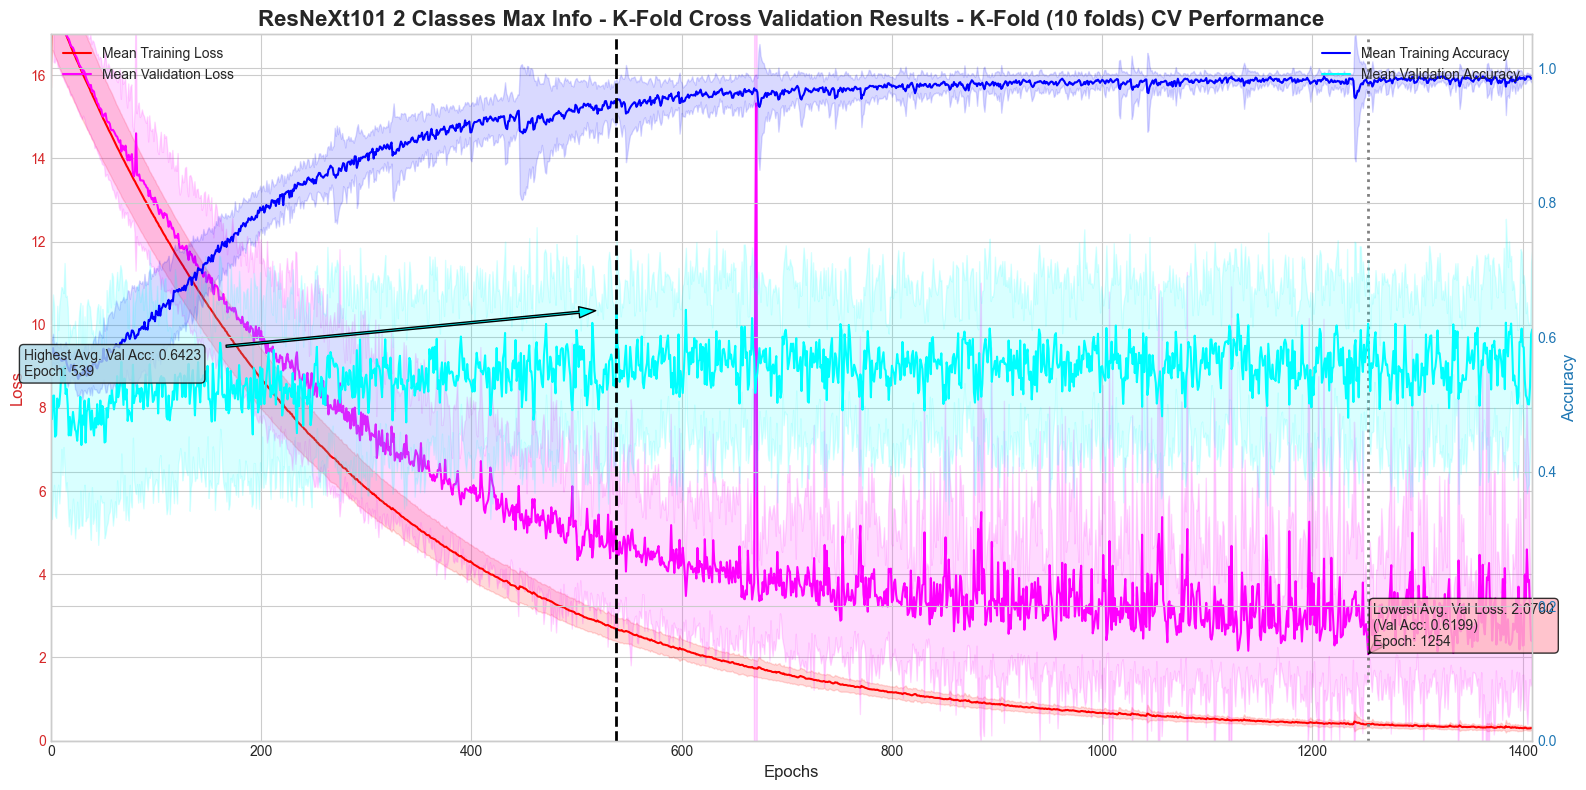

K-Fold Cross-Validation Summary for: 'ResNeXt101 2 Classes Max Info - K-Fold Cross Validation Results'
Analyzed 10 folds (Folds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).
Metrics truncated to 1410 epochs.
------------------------------------------------------------
Best Average Validation Loss: 2.0760 at epoch 1254
   - Validation Accuracy at this epoch: 0.6199
Highest Average Validation Accuracy: 0.6423 at epoch 539
ResNeXt101 2 Classes Max Info - K-Fold Cross Validation Summary - K-Fold Performance Summary
Searching for files in 1 location(s)...

--- Performance of 10 Unique Folds (at their individual best epochs) ---

      Total Epochs  Best Epoch  Val Accuracy  Val Loss  Train Accuracy  \
Fold                                                                     
0             2299        1223        0.7481    1.8351          0.9870   
1             1478        1178        0.8276    1.2507          0.9882   
2             1410        1347        0.7459    1.8622          0.9916   
3         

In [3]:
path_to_resnext101_max_info_2_classes_k_fold_pattern = '/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNeXt101/2_classes_training/max_info/resnext101_00_2cls_slice_clin_layer_gray_seq[[]t1-t1c-t2-flair-mask[]]_normal_DA_kfold_run_2026_01_12_14_08_53/history_resnext101_00_2cls_slice_clin_layer_gray_seq[[]t1-t1c-t2-flair-mask[]]_normal_DA_kfold_fold_*_run_2026_01_12_14_08_53.npy'

plot_kfold_results_with_confidence_band(
    path_to_resnext101_max_info_2_classes_k_fold_pattern,
    title = "ResNeXt101 2 Classes Max Info - K-Fold Cross Validation Results",
)

summarize_kfold_results(
    path_to_resnext101_max_info_2_classes_k_fold_pattern,
    title="ResNeXt101 2 Classes Max Info - K-Fold Cross Validation Summary",
)

## ResNet152

Epochs: 400
Lowest loss 12.1874 at learning rate 9.61e-02


0.09605058

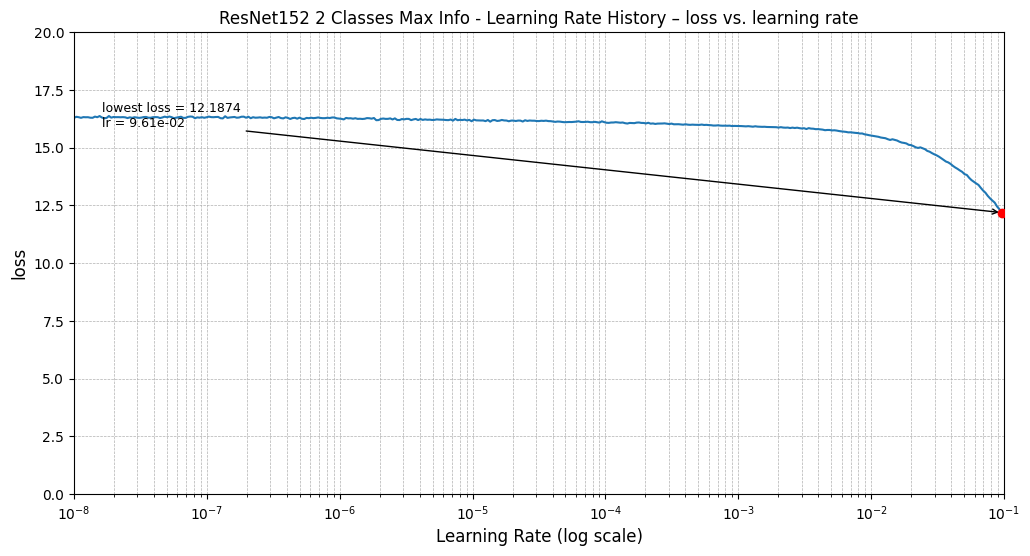

In [6]:
path_to_resnet152_max_info_2_classes_lr_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNet152/2_classes_training/max_info/resnet152_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_lr_run_2025_12_29_18_21_38/history_resnet152_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_lr_run_2025_12_29_18_21_38.npy')

plot_lr_history(path_to_resnet152_max_info_2_classes_lr_history, title="ResNet152 2 Classes Max Info - Learning Rate History", y_axis_max=20)

I'll pick a learning rate of 2 x 10^-2

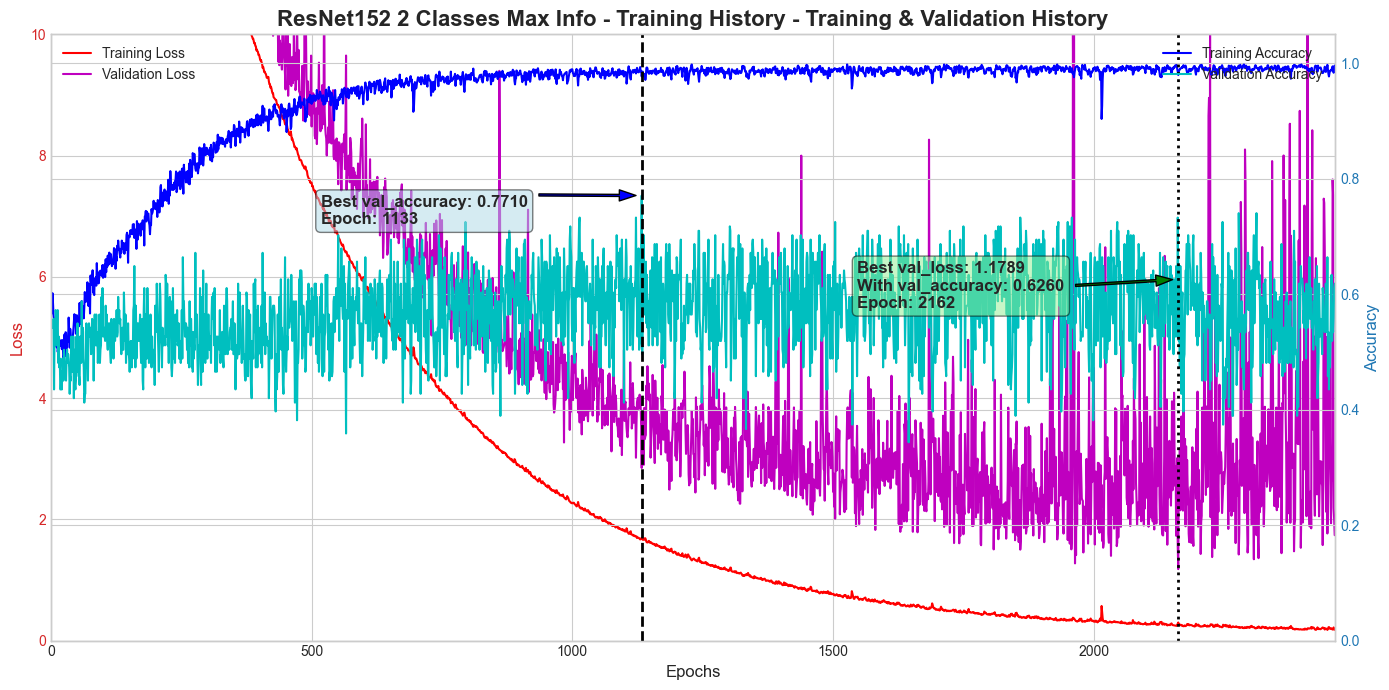

Training History Analysis for: 'ResNet152 2 Classes Max Info - Training History'
Total Epochs Trained: 2462
--------------------------------------------------
Lowest Validation Loss of 1.1789 achieved at Epoch 2162.
Validation Accuracy at this epoch was 0.6260.
--------------------------------------------------
Highest Validation Accuracy of 0.7710 achieved at Epoch 1133.
Validation Loss at this epoch was 2.8479.


In [11]:
path_to_resnet152_max_info_2_classes_train_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNet152/2_classes_training/max_info/resnet152_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_normal_run_2025_12_30_00_48_52/history_resnet152_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_normal_run_2025_12_30_00_48_52.npy')

plot_training_history(path_to_resnet152_max_info_2_classes_train_history, title="ResNet152 2 Classes Max Info - Training History", custom_loss_limit=10)

I'll increase the dropout rate to 0.45

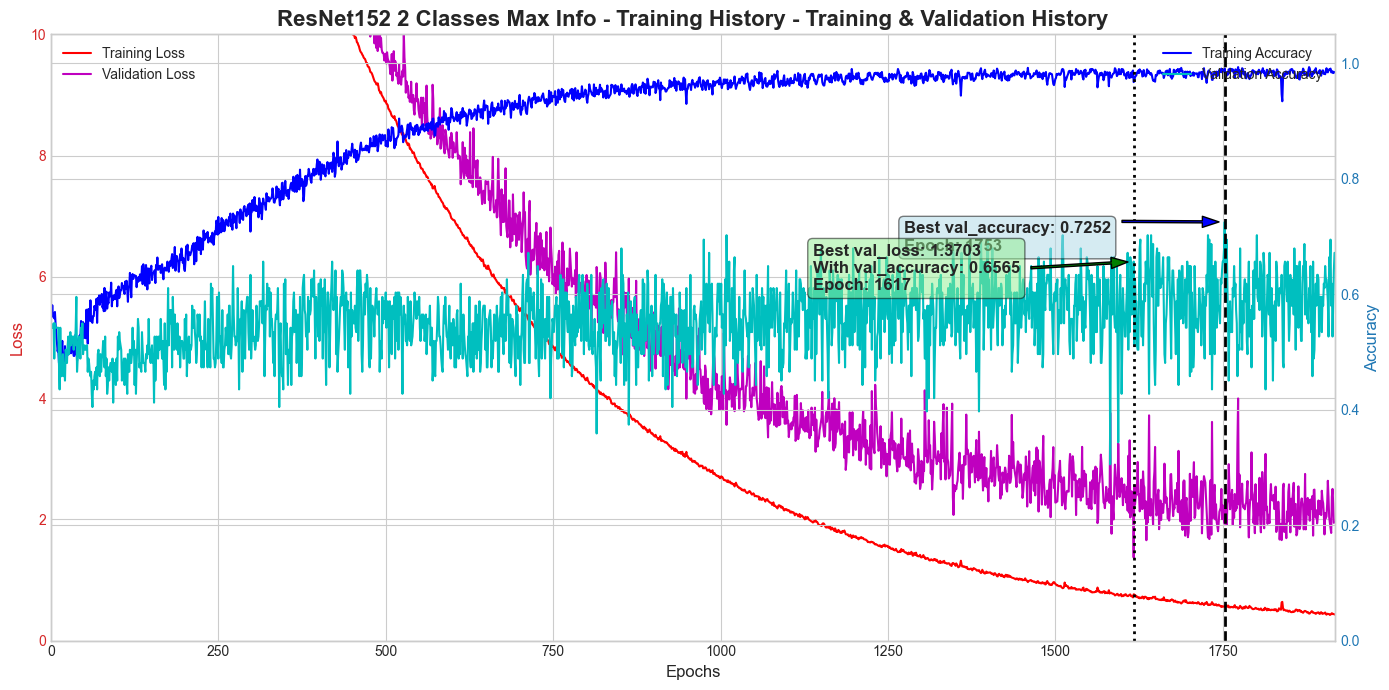

Training History Analysis for: 'ResNet152 2 Classes Max Info - Training History'
Total Epochs Trained: 1917
--------------------------------------------------
Lowest Validation Loss of 1.3703 achieved at Epoch 1617.
Validation Accuracy at this epoch was 0.6565.
--------------------------------------------------
Highest Validation Accuracy of 0.7252 achieved at Epoch 1753.
Validation Loss at this epoch was 1.9286.


In [4]:
path_to_resnet152_max_info_2_classes_dropout_045_train_history = Path('/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNet152/2_classes_training/max_info/resnet152_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_normal_run_2025_12_30_21_07_00/history_resnet152_00_2cls_slice_clin_layer_gray_seq[t1-t1c-t2-flair-mask]_normal_DA_normal_run_2025_12_30_21_07_00.npy')

plot_training_history(path_to_resnet152_max_info_2_classes_dropout_045_train_history, title="ResNet152 2 Classes Max Info - Training History", custom_loss_limit=10)

Even though it's still overfitting unfortunately, I'll keep this one because it seems more reliable than the previous run

K-Fold

Searching for files in 1 location(s)...
Pattern '/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNet152/2_classes_training/max_info/resnet152_00_2cls_slice_clin_layer_gray_seq[[]t1-t1c-t2-flair-mask[]]_normal_DA_kfold_run_2026_01_03_03_08_42/history_resnet152_00_2cls_slice_clin_layer_gray_seq[[]t1-t1c-t2-flair-mask[]]_normal_DA_kfold_fold_*_run_2026_01_03_03_08_42.npy' found 10 files.
Total unique files found: 10
Successfully loaded 10 folds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
All runs will be truncated to the shortest run length of 1665 epochs for fair comparison.


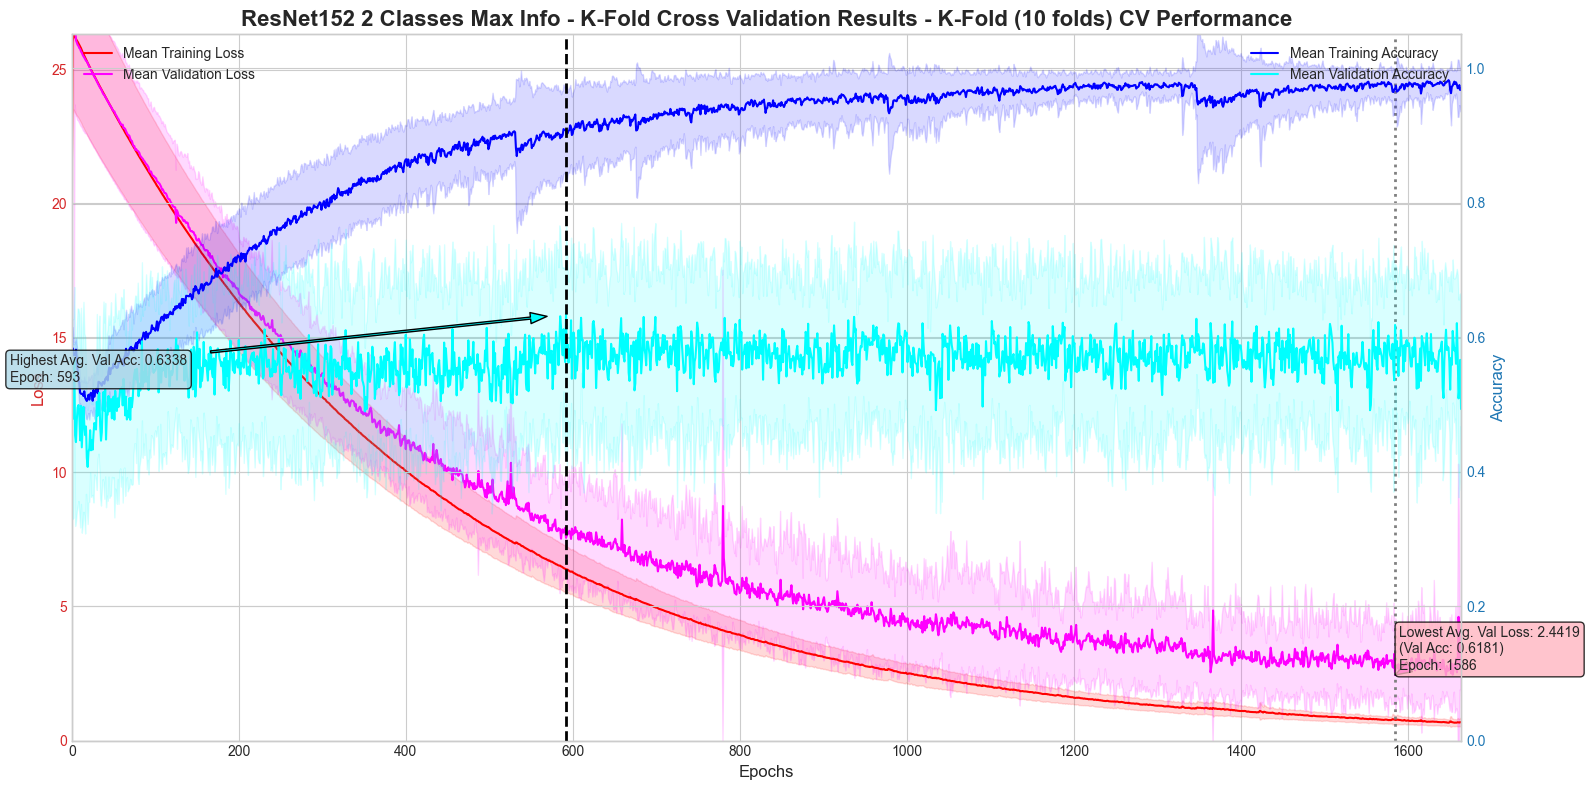

K-Fold Cross-Validation Summary for: 'ResNet152 2 Classes Max Info - K-Fold Cross Validation Results'
Analyzed 10 folds (Folds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).
Metrics truncated to 1665 epochs.
------------------------------------------------------------
Best Average Validation Loss: 2.4419 at epoch 1586
   - Validation Accuracy at this epoch: 0.6181
Highest Average Validation Accuracy: 0.6338 at epoch 593
ResNet152 2 Classes Max Info - K-Fold Cross Validation Summary - K-Fold Performance Summary
Searching for files in 1 location(s)...

--- Performance of 10 Unique Folds (at their individual best epochs) ---

      Total Epochs  Best Epoch  Val Accuracy  Val Loss  Train Accuracy  \
Fold                                                                     
0             2389         441        0.7252    9.3650          0.9018   
1             1665           1        0.6207       NaN          0.5669   
2             1804         757        0.7787    4.8245          0.9787   
3           

In [2]:
path_to_resnet152_max_info_2_classes_k_fold_pattern = '/Users/LennartPhilipp/Desktop/Uni/Prowiss/Training/training_histories_06_25/ResNet152/2_classes_training/max_info/resnet152_00_2cls_slice_clin_layer_gray_seq[[]t1-t1c-t2-flair-mask[]]_normal_DA_kfold_run_2026_01_03_03_08_42/history_resnet152_00_2cls_slice_clin_layer_gray_seq[[]t1-t1c-t2-flair-mask[]]_normal_DA_kfold_fold_*_run_2026_01_03_03_08_42.npy'

plot_kfold_results_with_confidence_band(
    path_to_resnet152_max_info_2_classes_k_fold_pattern,
    title = "ResNet152 2 Classes Max Info - K-Fold Cross Validation Results",
)

summarize_kfold_results(
    path_to_resnet152_max_info_2_classes_k_fold_pattern,
    title="ResNet152 2 Classes Max Info - K-Fold Cross Validation Summary",
)